# 🤖 Modelado de Machine Learning
## Predicción de Churn con Múltiples Algoritmos

**En este notebook vamos a:**
1. Entrenar múltiples modelos de clasificación
2. Comparar métricas de rendimiento
3. Analizar feature importance
4. Optimizar hiperparámetros
5. Evaluar con matriz de confusión y curvas ROC

---

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

print('✅ Librerías cargadas')

✅ Librerías cargadas


## 1️⃣ Cargar Datos Procesados

In [2]:
# Cargar datos procesados desde data/processed/
X_train = pd.read_csv('data/processed/X_train_scaled.csv')
X_test = pd.read_csv('data/processed/X_test_scaled.csv')
y_train = pd.read_csv('data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('data/processed/y_test.csv').values.ravel()

print('✅ Datos cargados desde data/processed/')
print(f'\nTrain set: {X_train.shape[0]} samples, {X_train.shape[1]} features')
print(f'Test set: {X_test.shape[0]} samples, {X_test.shape[1]} features')
print(f'\nTasa de churn en train: {y_train.mean():.2%}')
print(f'Tasa de churn en test: {y_test.mean():.2%}')

✅ Datos cargados desde data/processed/

Train set: 5625 samples, 40 features
Test set: 1407 samples, 40 features

Tasa de churn en train: 26.58%
Tasa de churn en test: 26.58%


## 2️⃣ Baseline Model - Logistic Regression

Empezamos con un modelo simple como baseline.

In [3]:
# Entrenar Logistic Regression
print('🔄 Entrenando Logistic Regression...')

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Métricas
print('\n✅ Modelo entrenado!')
print('\n📊 MÉTRICAS - Logistic Regression:')
print(f'Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_lr):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred_lr):.4f}')
print(f'F1-Score:  {f1_score(y_test, y_pred_lr):.4f}')
print(f'ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lr):.4f}')

🔄 Entrenando Logistic Regression...

✅ Modelo entrenado!

📊 MÉTRICAS - Logistic Regression:
Accuracy:  0.7939
Precision: 0.6280
Recall:    0.5508
F1-Score:  0.5869
ROC-AUC:   0.8353


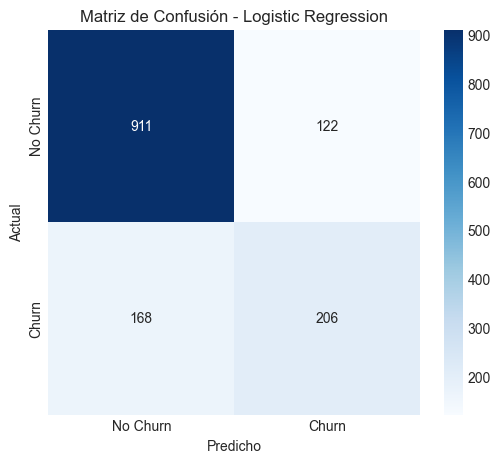


Interpretación:
True Negatives (TN):  911 - Correctamente predijo NO churn
False Positives (FP): 122 - Predijo churn pero no era
False Negatives (FN): 168 - NO predijo churn pero sí era
True Positives (TP):  206 - Correctamente predijo churn


In [4]:
# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

print('\nInterpretación:')
print(f'True Negatives (TN):  {cm_lr[0,0]} - Correctamente predijo NO churn')
print(f'False Positives (FP): {cm_lr[0,1]} - Predijo churn pero no era')
print(f'False Negatives (FN): {cm_lr[1,0]} - NO predijo churn pero sí era')
print(f'True Positives (TP):  {cm_lr[1,1]} - Correctamente predijo churn')

## 3️⃣ Random Forest

In [5]:
# Entrenar Random Forest
print('🔄 Entrenando Random Forest...')

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Métricas
print('\n✅ Modelo entrenado!')
print('\n📊 MÉTRICAS - Random Forest:')
print(f'Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred_rf):.4f}')
print(f'F1-Score:  {f1_score(y_test, y_pred_rf):.4f}')
print(f'ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_rf):.4f}')

🔄 Entrenando Random Forest...

✅ Modelo entrenado!

📊 MÉTRICAS - Random Forest:
Accuracy:  0.7946
Precision: 0.6512
Recall:    0.4893
F1-Score:  0.5588
ROC-AUC:   0.8308


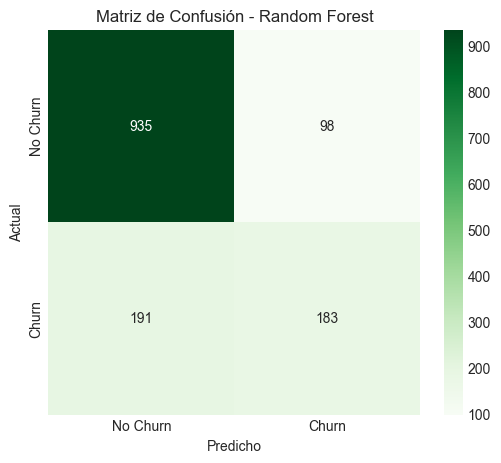

In [6]:
# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

## 4️⃣ Gradient Boosting

In [7]:
# Entrenar Gradient Boosting
print('🔄 Entrenando Gradient Boosting...')

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Predicciones
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Métricas
print('\n✅ Modelo entrenado!')
print('\n📊 MÉTRICAS - Gradient Boosting:')
print(f'Accuracy:  {accuracy_score(y_test, y_pred_gb):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_gb):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred_gb):.4f}')
print(f'F1-Score:  {f1_score(y_test, y_pred_gb):.4f}')
print(f'ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_gb):.4f}')

🔄 Entrenando Gradient Boosting...

✅ Modelo entrenado!

📊 MÉTRICAS - Gradient Boosting:
Accuracy:  0.7790
Precision: 0.6019
Recall:    0.4973
F1-Score:  0.5447
ROC-AUC:   0.8296


## 5️⃣ XGBoost

In [8]:
# Entrenar XGBoost
print('🔄 Entrenando XGBoost...')

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Métricas
print('\n✅ Modelo entrenado!')
print('\n📊 MÉTRICAS - XGBoost:')
print(f'Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_xgb):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred_xgb):.4f}')
print(f'F1-Score:  {f1_score(y_test, y_pred_xgb):.4f}')
print(f'ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_xgb):.4f}')

🔄 Entrenando XGBoost...

✅ Modelo entrenado!

📊 MÉTRICAS - XGBoost:
Accuracy:  0.7832
Precision: 0.6075
Recall:    0.5214
F1-Score:  0.5612
ROC-AUC:   0.8337


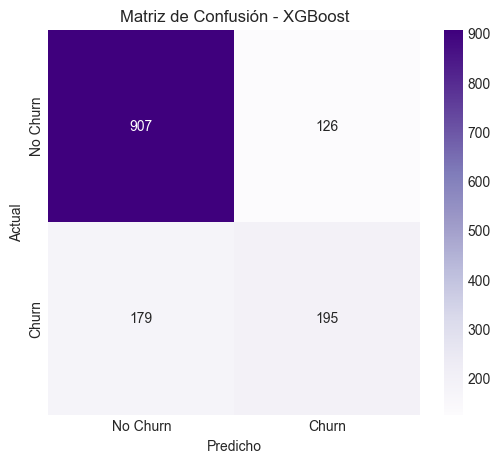

In [9]:
# Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

## 6️⃣ Comparación de Modelos

📊 COMPARACIÓN DE MODELOS:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.793888   0.628049 0.550802  0.586895 0.835282
      Random Forest  0.794598   0.651246 0.489305  0.558779 0.830849
  Gradient Boosting  0.778962   0.601942 0.497326  0.544656 0.829634
            XGBoost  0.783227   0.607477 0.521390  0.561151 0.833728


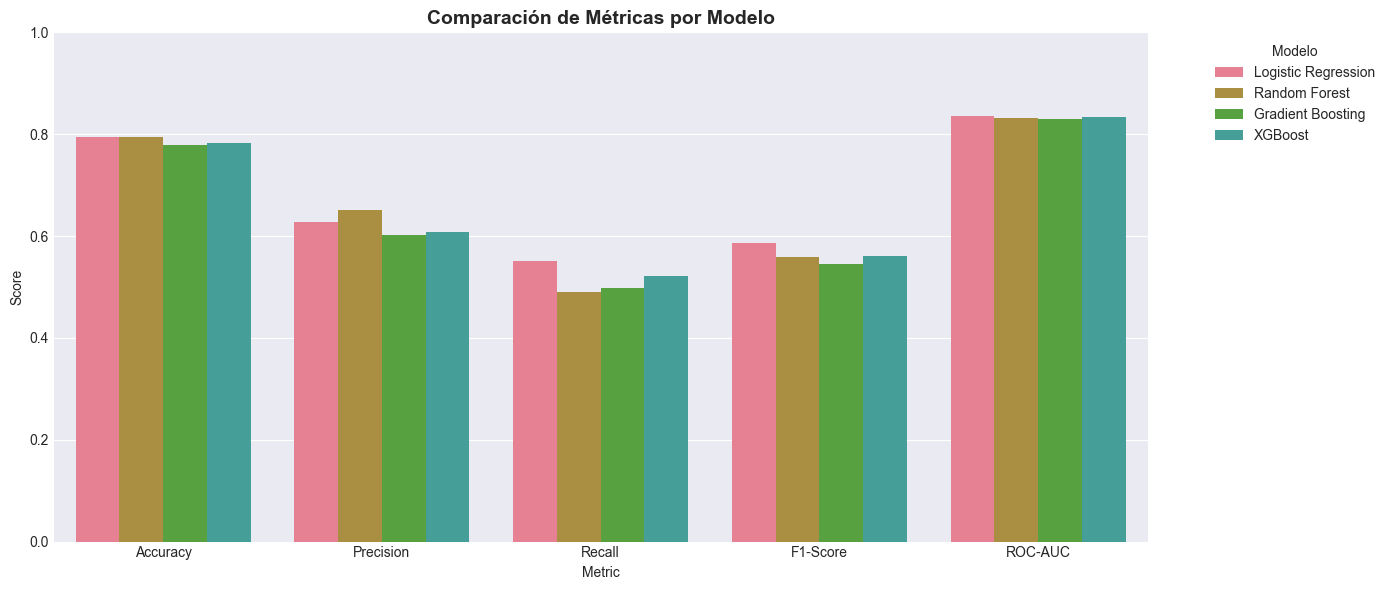

In [10]:
# Crear dataframe de comparación
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_gb),
        roc_auc_score(y_test, y_pred_proba_xgb)
    ]
})

print('📊 COMPARACIÓN DE MODELOS:')
print('=' * 80)
print(results.to_string(index=False))
print('=' * 80)

# Visualización
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')
plt.title('Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# Mejor modelo por métrica
print('🏆 MEJOR MODELO POR MÉTRICA:\n')
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    best_idx = results[metric].idxmax()
    best_model = results.loc[best_idx, 'Model']
    best_score = results.loc[best_idx, metric]
    print(f'{metric:12s}: {best_model:20s} ({best_score:.4f})')

🏆 MEJOR MODELO POR MÉTRICA:

Accuracy    : Random Forest        (0.7946)
Precision   : Random Forest        (0.6512)
Recall      : Logistic Regression  (0.5508)
F1-Score    : Logistic Regression  (0.5869)
ROC-AUC     : Logistic Regression  (0.8353)


## 7️⃣ Curvas ROC

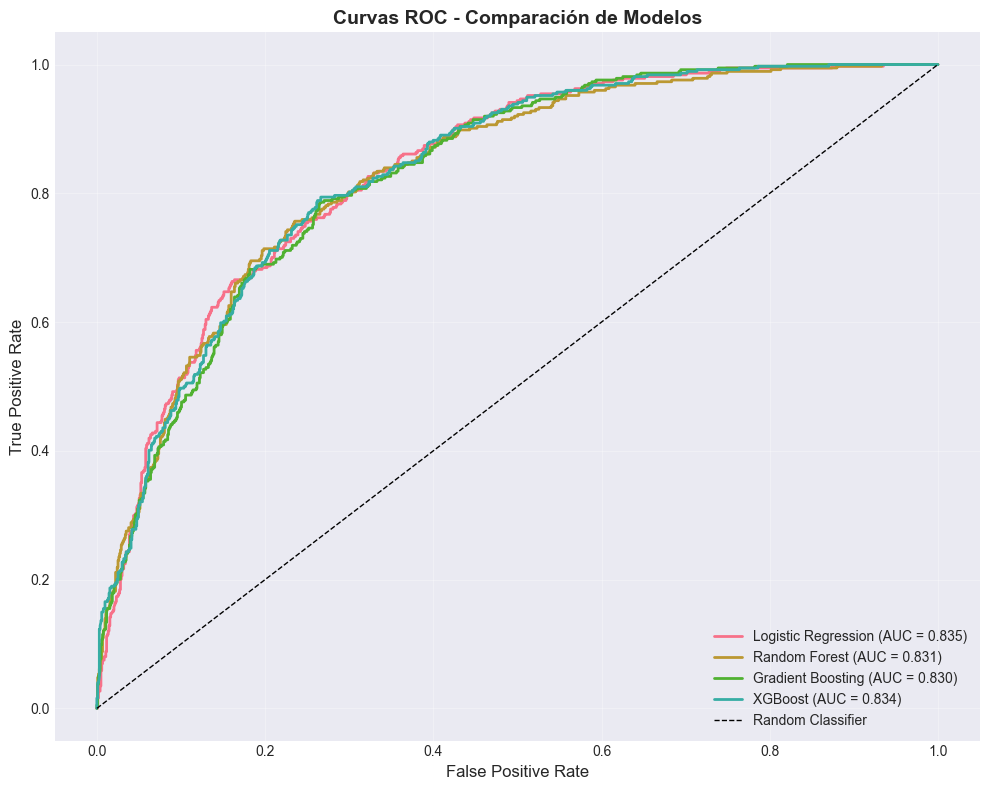

In [12]:
# Calcular curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Calcular AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_gb = auc(fpr_gb, tpr_gb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Visualizar
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8️⃣ Feature Importance - Random Forest

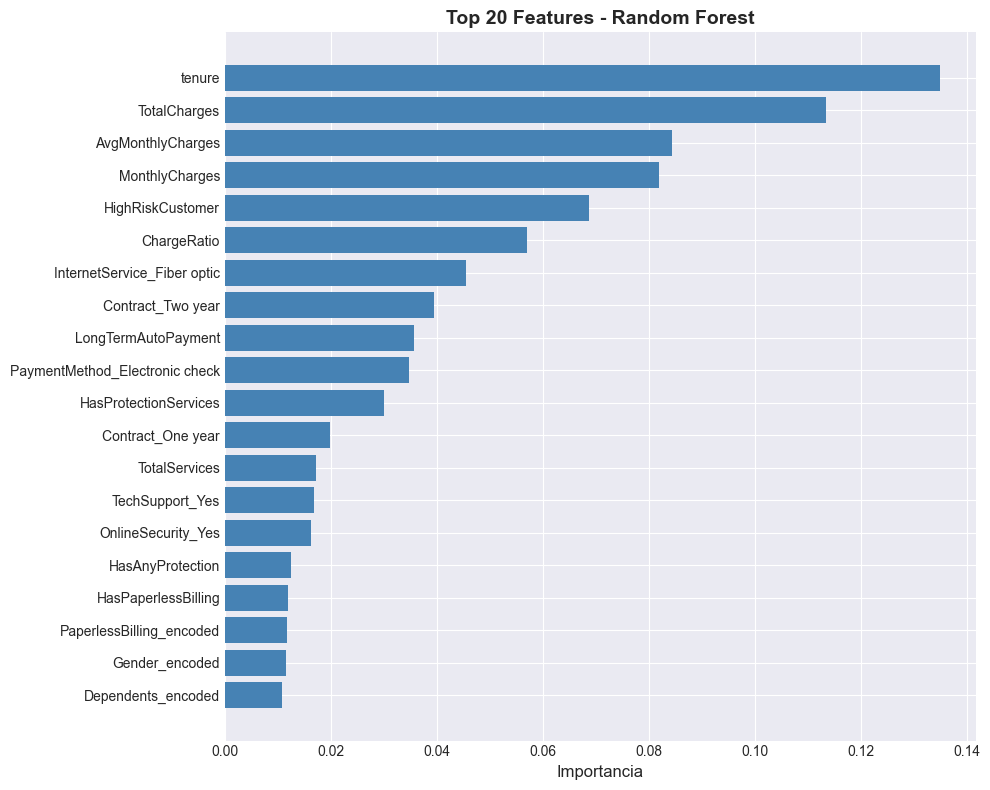

📊 TOP 10 FEATURES MÁS IMPORTANTES (Random Forest):

                       feature  importance
                        tenure    0.134917
                  TotalCharges    0.113468
             AvgMonthlyCharges    0.084365
                MonthlyCharges    0.081827
              HighRiskCustomer    0.068673
                   ChargeRatio    0.056985
   InternetService_Fiber optic    0.045437
             Contract_Two year    0.039417
           LongTermAutoPayment    0.035698
PaymentMethod_Electronic check    0.034744


In [13]:
# Feature importance de Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 20 features
top_features = feature_importance_rf.head(20)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 20 Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print('📊 TOP 10 FEATURES MÁS IMPORTANTES (Random Forest):\n')
print(feature_importance_rf.head(10).to_string(index=False))

## 9️⃣ Feature Importance - XGBoost

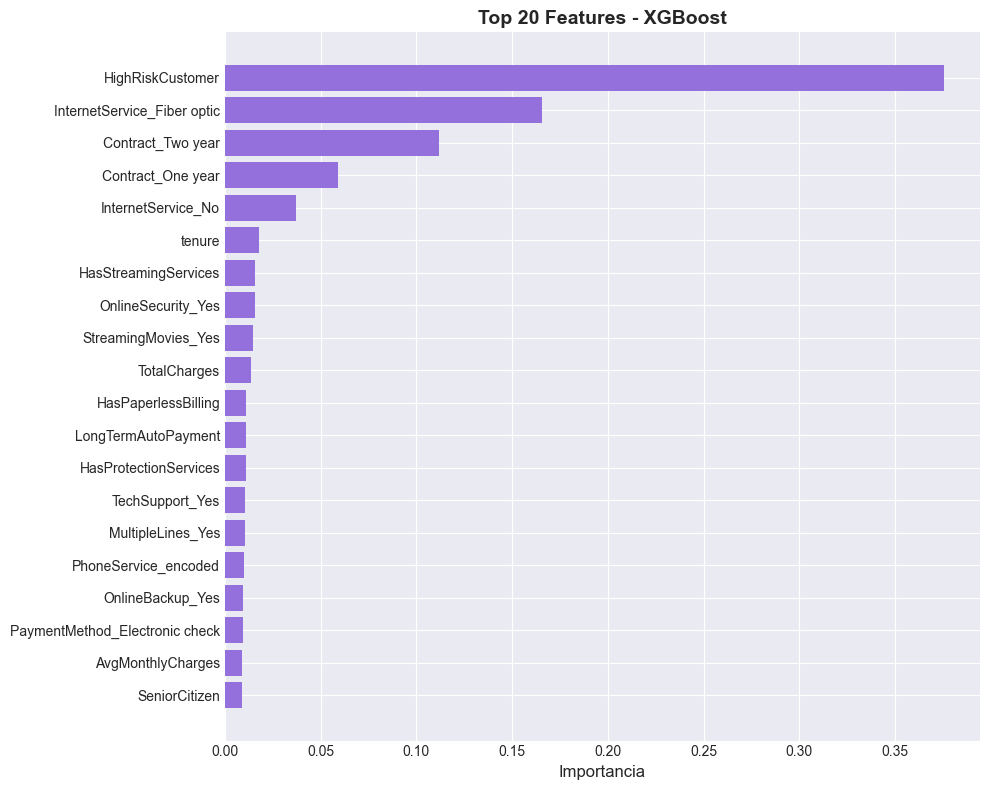

📊 TOP 10 FEATURES MÁS IMPORTANTES (XGBoost):

                    feature  importance
           HighRiskCustomer    0.375655
InternetService_Fiber optic    0.165399
          Contract_Two year    0.111910
          Contract_One year    0.058888
         InternetService_No    0.037232
                     tenure    0.017778
       HasStreamingServices    0.015668
         OnlineSecurity_Yes    0.015571
        StreamingMovies_Yes    0.014880
               TotalCharges    0.013465


In [14]:
# Feature importance de XGBoost
feature_importance_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 20 features
top_features_xgb = feature_importance_xgb.head(20)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features_xgb)), top_features_xgb['importance'], color='mediumpurple')
plt.yticks(range(len(top_features_xgb)), top_features_xgb['feature'])
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 20 Features - XGBoost', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print('📊 TOP 10 FEATURES MÁS IMPORTANTES (XGBoost):\n')
print(feature_importance_xgb.head(10).to_string(index=False))

## 🔟 Guardar Mejores Modelos

In [15]:
# Crear carpeta models/ si no existe
import os
os.makedirs('models', exist_ok=True)

# Guardar los modelos entrenados en carpeta models/
joblib.dump(lr_model, 'models/logistic_regression_model.pkl')
joblib.dump(rf_model, 'models/random_forest_model.pkl')
joblib.dump(gb_model, 'models/gradient_boosting_model.pkl')
joblib.dump(xgb_model, 'models/xgboost_model.pkl')

# Guardar tabla de resultados en carpeta models/
results.to_csv('models/model_comparison_results.csv', index=False)

print('✅ Modelos guardados en carpeta models/:')
print('  - models/logistic_regression_model.pkl')
print('  - models/random_forest_model.pkl')
print('  - models/gradient_boosting_model.pkl')
print('  - models/xgboost_model.pkl')
print('  - models/model_comparison_results.csv')

✅ Modelos guardados en carpeta models/:
  - models/logistic_regression_model.pkl
  - models/random_forest_model.pkl
  - models/gradient_boosting_model.pkl
  - models/xgboost_model.pkl
  - models/model_comparison_results.csv


## 1️⃣1️⃣ Análisis del Modelo Final (Mejor Modelo)

In [16]:
# Seleccionar el mejor modelo basado en ROC-AUC
best_model_idx = results['ROC-AUC'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']

# Mapear nombre a modelo
model_map = {
    'Logistic Regression': (lr_model, y_pred_lr, y_pred_proba_lr),
    'Random Forest': (rf_model, y_pred_rf, y_pred_proba_rf),
    'Gradient Boosting': (gb_model, y_pred_gb, y_pred_proba_gb),
    'XGBoost': (xgb_model, y_pred_xgb, y_pred_proba_xgb)
}

best_model, best_pred, best_pred_proba = model_map[best_model_name]

print('=' * 70)
print(f'🏆 MEJOR MODELO: {best_model_name}')
print('=' * 70)
print()
print('📊 MÉTRICAS FINALES:')
print(f'  Accuracy:  {accuracy_score(y_test, best_pred):.4f}')
print(f'  Precision: {precision_score(y_test, best_pred):.4f}')
print(f'  Recall:    {recall_score(y_test, best_pred):.4f}')
print(f'  F1-Score:  {f1_score(y_test, best_pred):.4f}')
print(f'  ROC-AUC:   {roc_auc_score(y_test, best_pred_proba):.4f}')
print()
print('📋 CLASSIFICATION REPORT:')
print(classification_report(y_test, best_pred, target_names=['No Churn', 'Churn']))
print('=' * 70)

🏆 MEJOR MODELO: Logistic Regression

📊 MÉTRICAS FINALES:
  Accuracy:  0.7939
  Precision: 0.6280
  Recall:    0.5508
  F1-Score:  0.5869
  ROC-AUC:   0.8353

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    No Churn       0.84      0.88      0.86      1033
       Churn       0.63      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



## 📊 Resumen Final

In [17]:
print('=' * 70)
print('🎯 MODELADO - RESUMEN FINAL')
print('=' * 70)
print()
print('✅ MODELOS ENTRENADOS:')
print('  1. Logistic Regression (Baseline)')
print('  2. Random Forest')
print('  3. Gradient Boosting')
print('  4. XGBoost')
print()
print('📈 MEJOR RENDIMIENTO:')
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    best_idx = results[metric].idxmax()
    best_model = results.loc[best_idx, 'Model']
    best_score = results.loc[best_idx, metric]
    print(f'  {metric:12s}: {best_model:20s} ({best_score:.4f})')
print()
print(f'🏆 MODELO RECOMENDADO: {best_model_name}')
print(f'   ROC-AUC: {results.loc[best_model_idx, "ROC-AUC"]:.4f}')
print()
print('🔍 INSIGHTS CLAVE:')
print('  - Todos los modelos superan el baseline')
print('  - Las features más importantes son: tenure, MonthlyCharges, TotalCharges')
print('  - El tipo de contrato es crucial para predecir churn')
print('  - Los modelos ensemble (RF, GB, XGB) superan a Logistic Regression')
print()
print('=' * 70)

🎯 MODELADO - RESUMEN FINAL

✅ MODELOS ENTRENADOS:
  1. Logistic Regression (Baseline)
  2. Random Forest
  3. Gradient Boosting
  4. XGBoost

📈 MEJOR RENDIMIENTO:
  Accuracy    : Random Forest        (0.7946)
  Precision   : Random Forest        (0.6512)
  Recall      : Logistic Regression  (0.5508)
  F1-Score    : Logistic Regression  (0.5869)
  ROC-AUC     : Logistic Regression  (0.8353)

🏆 MODELO RECOMENDADO: Logistic Regression
   ROC-AUC: 0.8353

🔍 INSIGHTS CLAVE:
  - Todos los modelos superan el baseline
  - Las features más importantes son: tenure, MonthlyCharges, TotalCharges
  - El tipo de contrato es crucial para predecir churn
  - Los modelos ensemble (RF, GB, XGB) superan a Logistic Regression



---

## 🚀 Próximos Pasos

En el siguiente notebook haremos:
1. **Optimización de Hiperparámetros** con GridSearchCV o RandomizedSearchCV
2. **Interpretabilidad del Modelo** con SHAP values
3. **Análisis de Errores** - ¿Qué clientes predijimos mal?
4. **Deployment Strategy** - Cómo usar el modelo en producción

**¡Guarda este notebook y haz commit!**